In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid", color_codes=True, palette="muted")
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('data/marketing_campaign.csv', sep='	')
data    # 2240 rows × 29 columns

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

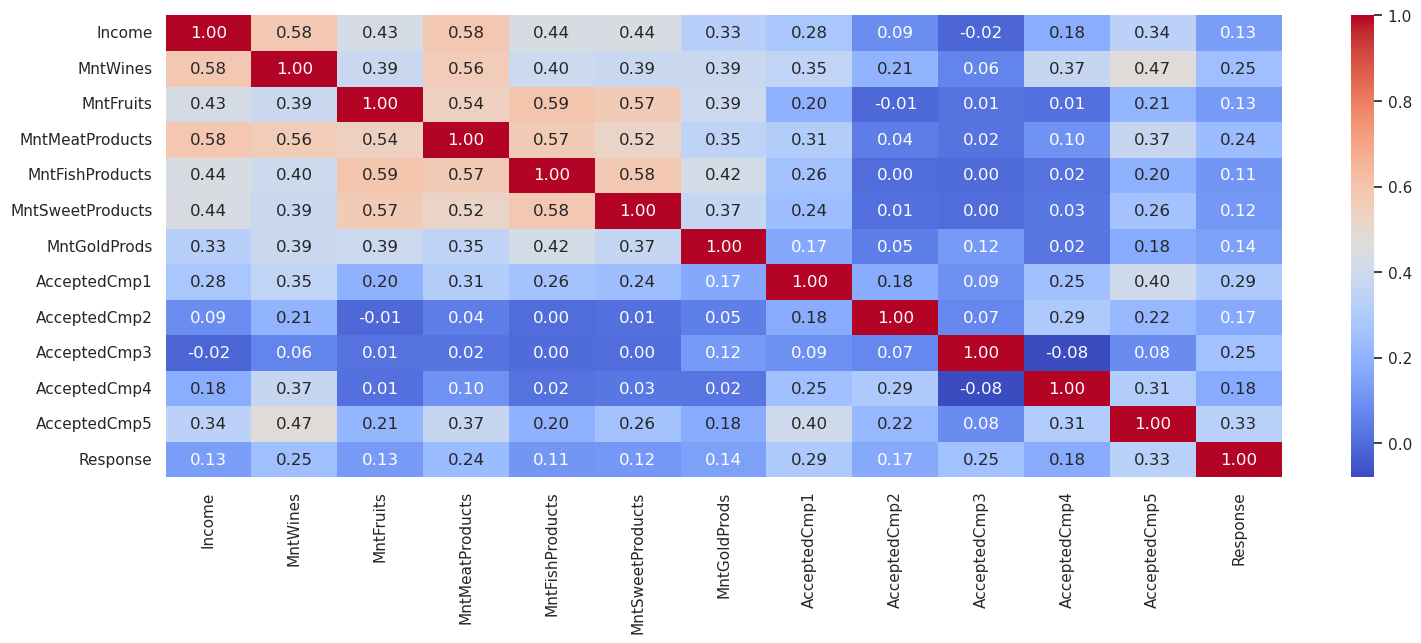

In [48]:
plt.figure(figsize=(18, 6))
cols_of_choice = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
corr_mat = data[cols_of_choice].corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

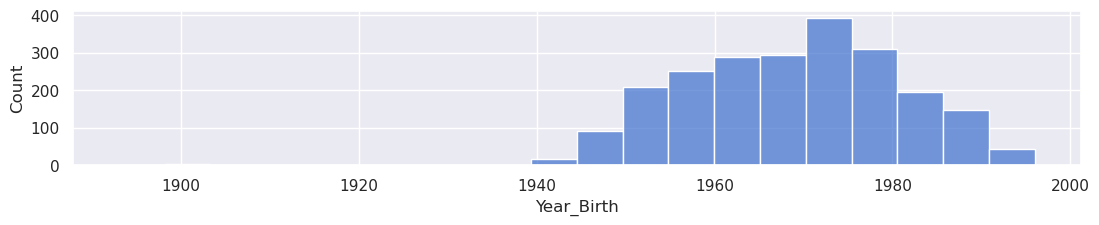

In [ ]:
plt.figure(figsize=(13, 2)), 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'
sns.histplot(data['Year_Birth'], bins=20)
plt.show()

In [7]:
data = data[data['Year_Birth'] > 1940]

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="mixed")
data.loc[:, 'Age'] = data['Dt_Customer'].dt.year - data['Year_Birth']

In [8]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      478
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [9]:
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')
data['Marital_Status'] = data['Marital_Status'].replace(['Widow'], 'Divorced')
data['Marital_Status'] = data['Marital_Status'].replace(['Together'], 'Married')

In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

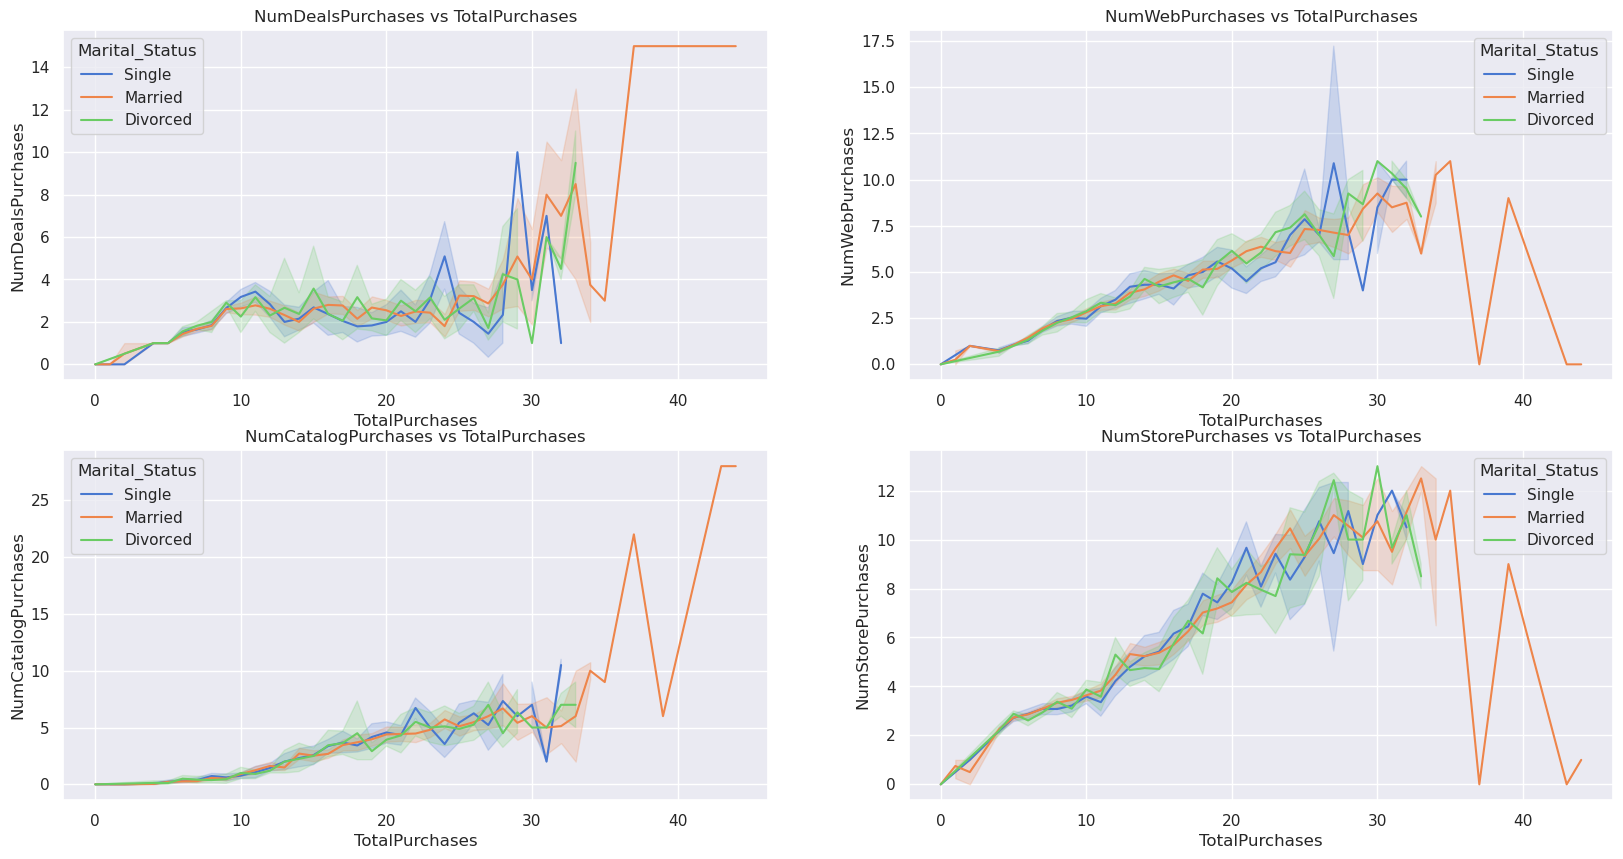

In [12]:
purchase_types = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data['TotalPurchases'] = data[purchase_types].sum(axis=1)

expences = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['TotalExpences'] = data[expences].sum(axis=1)

# plt.Figure(figsize=(16, 4))
# sns.lineplot(data=data, x='TotalPurchases', y='MntGoldProds', hue='Marital_Status')
# plt.show()

from scipy.ndimage.filters import gaussian_filter1d

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.ravel()
for i, col in enumerate(purchase_types):
    # sns.histplot(data=data, x=col, hue='Marital_Status', ax=axs[i])
    sns.lineplot(data=data, 
                 x='TotalPurchases', y=col, hue='Marital_Status', 
                 ax=axs[i])
    
    # sns.scatterplot(data=data, x='TotalPurchases', y=col, hue='Marital_Status', ax=axs[i], )
    # for status in data['Marital_Status'].unique():
    #     subset = data[data['Marital_Status'] == status]
    #     sns.regplot(data=subset, x='TotalPurchases', 
    #                 y=col, scatter=False, 
    #                 ax=axs[i], line_kws={'linestyle':'--', 'label': None},
    #                 )
    axs[i].set_title(f"{col} vs TotalPurchases")
plt.show()

-   web purchase is most volatile
-   married people buys catalog and deals way more than others

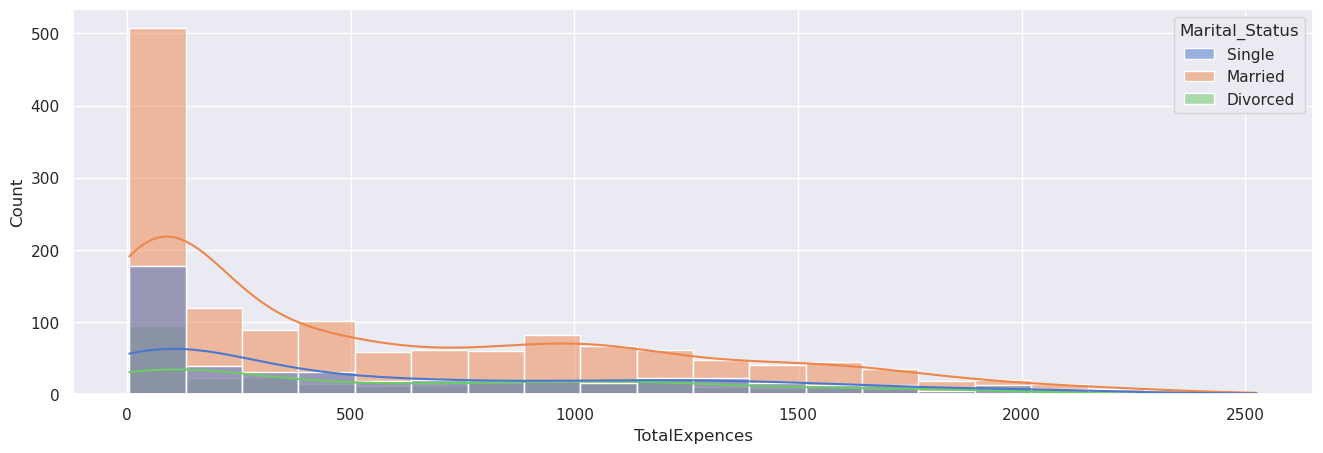

In [16]:
plt.figure(figsize=(16, 5))
sns.histplot(data=data, x='TotalExpences', hue='Marital_Status', bins=20, kde=True, palette='muted')
plt.show()

-   `married` people buys the most followed by `> single > divorced`

In [28]:
dct = {'Single': 1, 'Married': 2, 'Divorced': 1}
parent_count = data['Marital_Status'].map(dct)
kiddos_home = data['Kidhome'] + data['Teenhome'] + 1

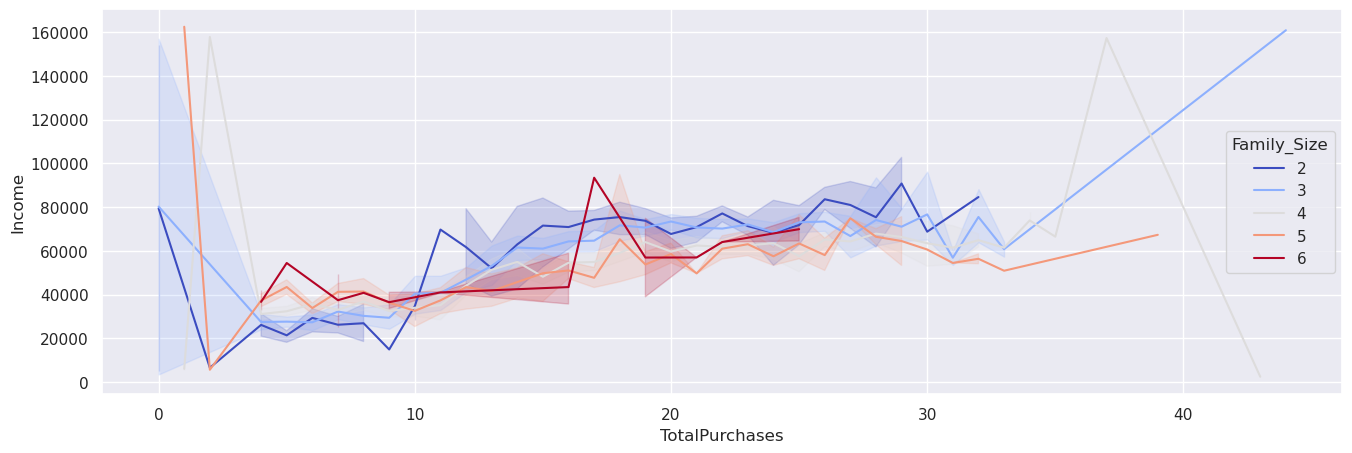

In [57]:
data['Family_Size'] = parent_count + kiddos_home
plt.figure(figsize=(16, 5))
sns.lineplot(data=data, x='TotalPurchases', y='Income', hue='Family_Size', palette='coolwarm')
plt.show()

-   family_size of 6 shows a limited purchase upto `~25` regardless their `income`
-   family of 2 makes high number of purchases if their income is greater that the average `40k - 80k`
-   family of 5 & 4 is a bit volatile
-   family of 3 shows a steady growth b/w `5-`

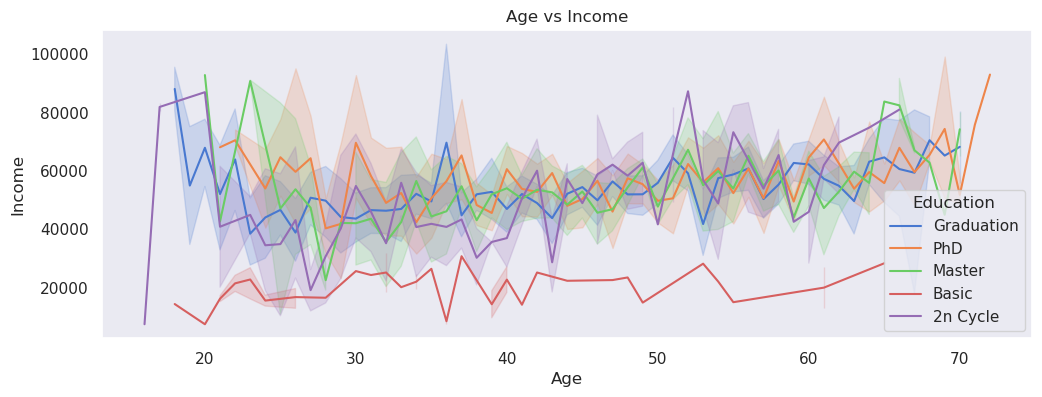

In [17]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=data, x='Age', y='Income', hue='Education')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()

- lower education (2n Cycle) == lower pay
- Age doesn't matter

In [53]:
data = data[data['Income'] < 600000]
data['Income'].describe()

count      2211.000000
mean      51959.180461
std       21532.141688
min        1730.000000
25%       35221.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

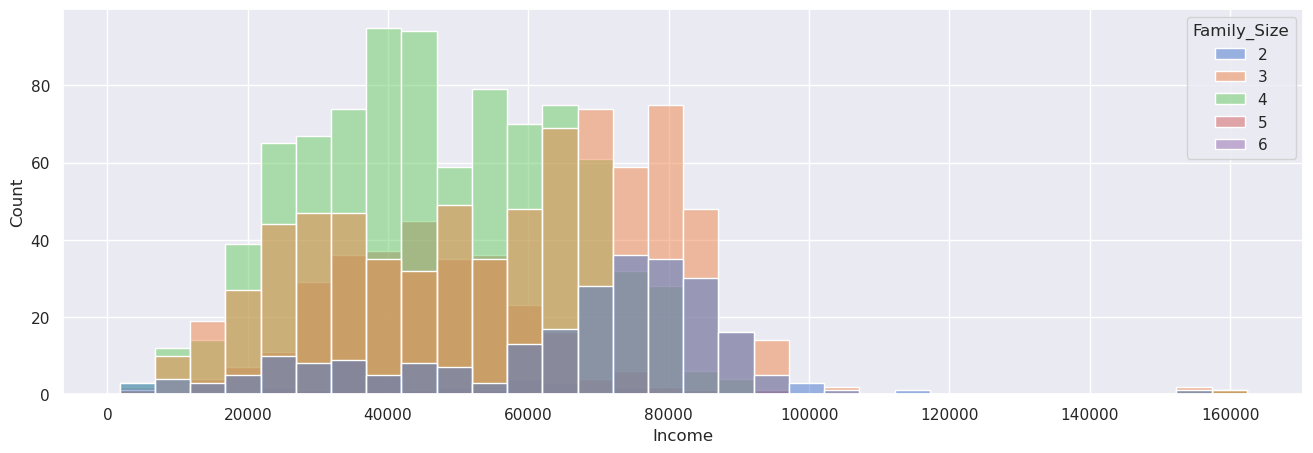

In [63]:
plt.figure(figsize=(16, 5))
sns.histplot(data=data, x='Income', hue='Family_Size', palette='muted')
plt.show()

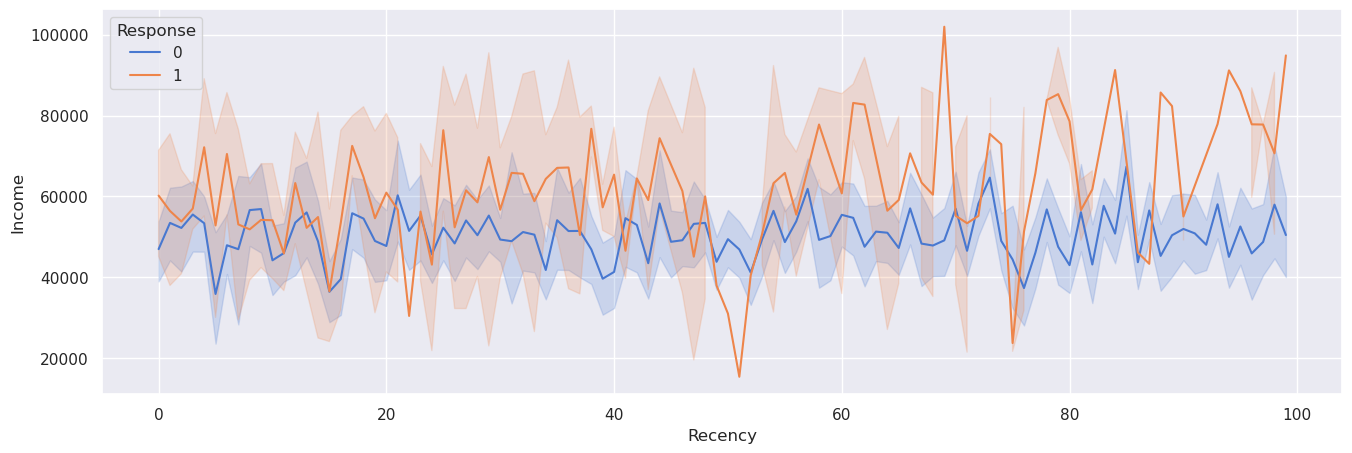

In [73]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=data, x='Recency', hue='Response', y='Income', palette='muted')
plt.show()

In [ ]:
print(cols_of_choice)
grouped_by_response = data[cols_of_choice].groupby('Response').mean()
sns.histplot

['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']


Income    MntWines  MntFruits  MntMeatProducts  \
Response                                                         
0         50496.233227  270.383919  24.284878       144.642705   
1         60209.675676  502.615616  37.939940       293.765766   

          MntFishProducts  MntSweetProducts  MntGoldProds  AcceptedCmp1  \
Response                                                                  
0               35.174654         25.052716     40.873802      0.033546   
1               51.714715         38.372372     61.252252      0.237237   

          AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  
Response                                                          
0             0.005325      0.045793      0.054313      0.037274  
1             0.060060      0.231231      0.186186      0.273273

-   those who `responded` have higher `Income`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Response`

In [18]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'TotalPurchases', 'TotalExpences'],
      dtype='object')

### Final summary

- lower education (2n Cycle) == lower pay
- Age doesn't matter
-   those who `responded` have higher `Income`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Response`
-   family_size of 6 shows a limited purchase upto `~25` regardless their `income`
-   family of 2 makes high number of purchases if their income is greater that the average `40k - 80k`
-   family of 5 & 4 is a bit volatile
-   family of 3 shows a steady growth b/w `5-`
-   `married` people buys the most followed by `> single > divorced`
-   web purchase is most volatile
-   married people buys catalog and deals way more than others

# Model

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, DBSCAN

In [105]:
cols_to_keep = ['Family_Size', 'Income', 'Age', 'TotalPurchases', 'TotalExpences', 'Response', 'Recency', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Education', 'Marital_Status']

abt = data[cols_to_keep].copy()
abt = pd.get_dummies(abt, columns=['Education', 'Marital_Status'], drop_first=True)
# Y = abt['Response']
# abt = abt.drop(columns=['Response'], errors='ignore', axis=1)
abt.shape

(2211, 16)

In [106]:
scaler = StandardScaler()
abt_scaled = scaler.fit_transform(abt)

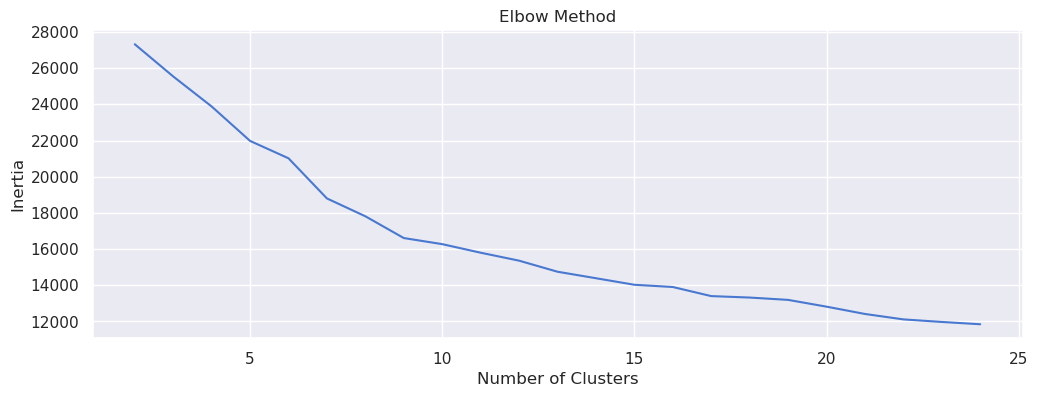

In [107]:
# finding optimal k
inertia = []
k_range = range(2, 25)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(abt_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 4))
sns.lineplot(x=k_range, y=inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

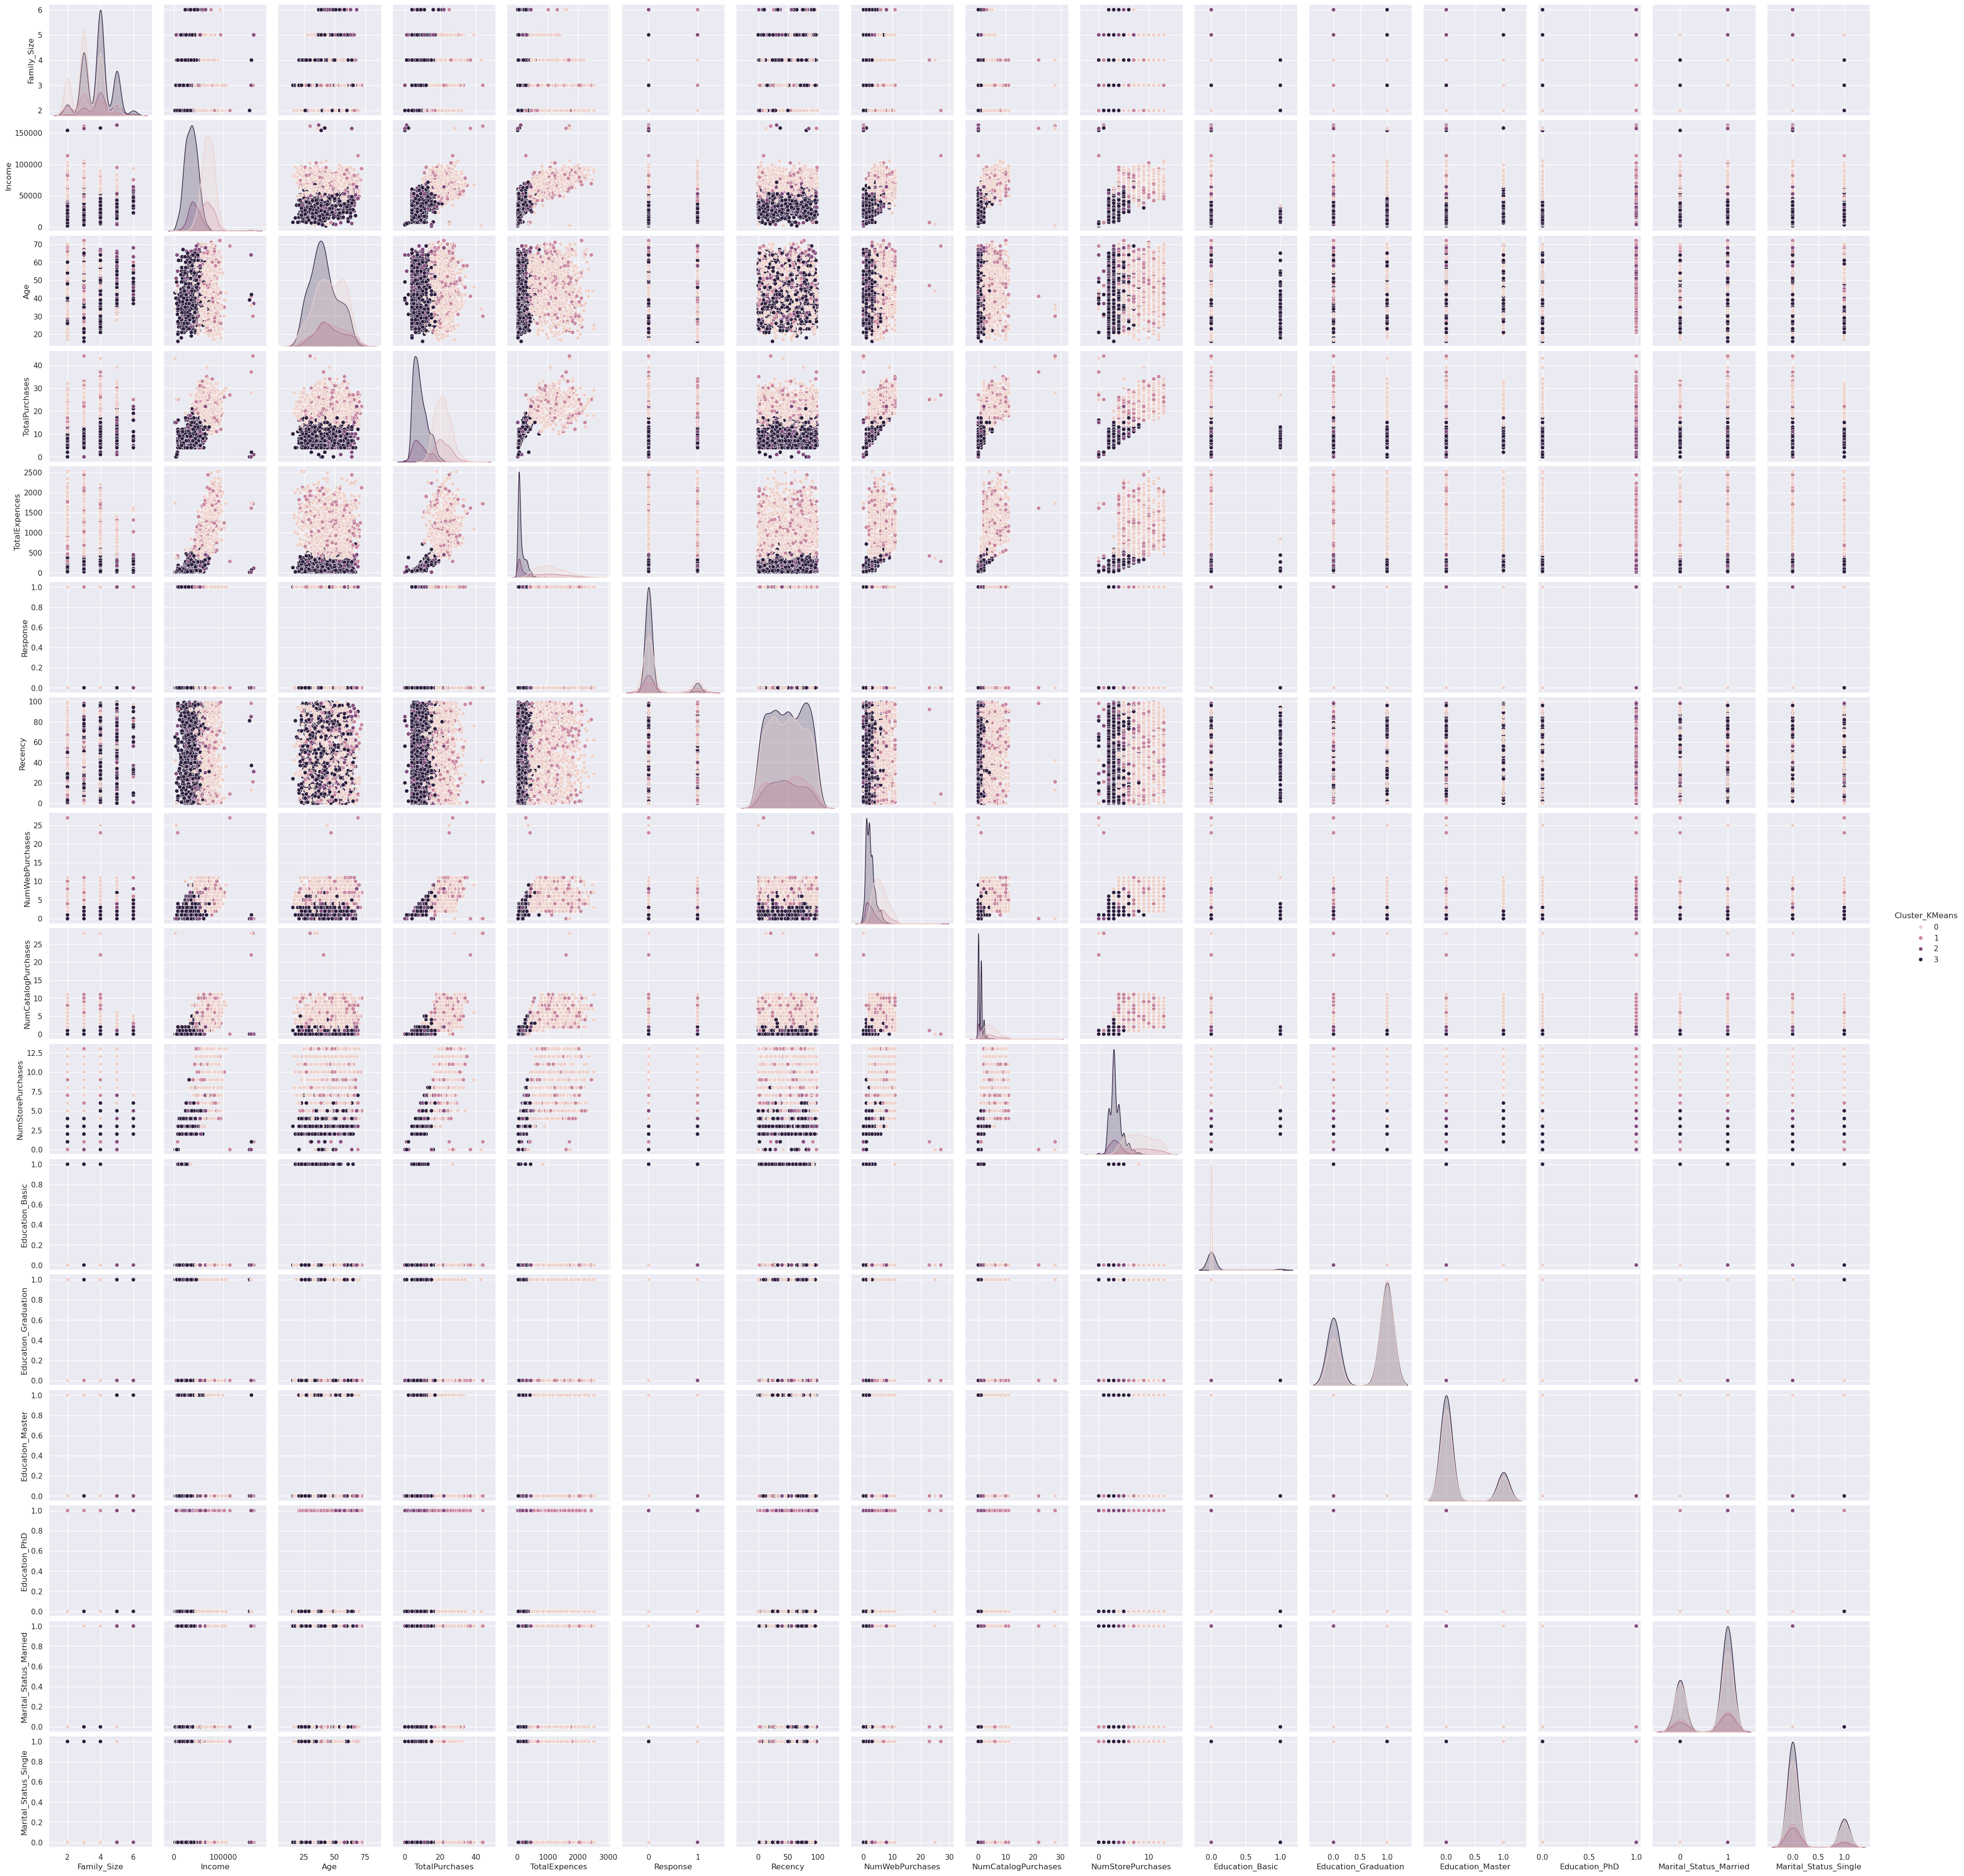

In [108]:
optimal_k = 4  # looks good to me
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
abt['Cluster_KMeans'] = kmeans.fit_predict(abt_scaled)

sns.pairplot(abt, hue='Cluster_KMeans', diag_kind='kde')
plt.show()

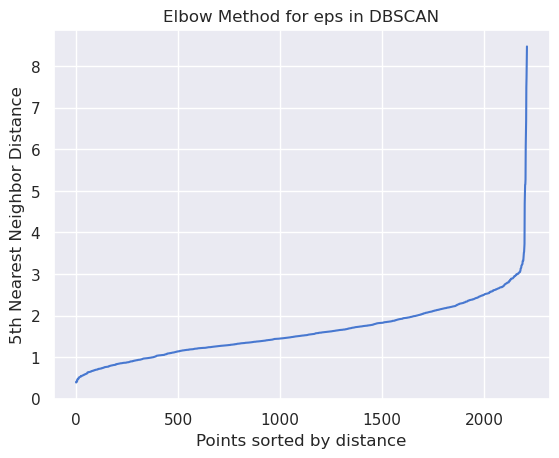

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(abt_scaled)
distances, indices = neighbors_fit.kneighbors(abt_scaled)

distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("Elbow Method for eps in DBSCAN")
plt.show()



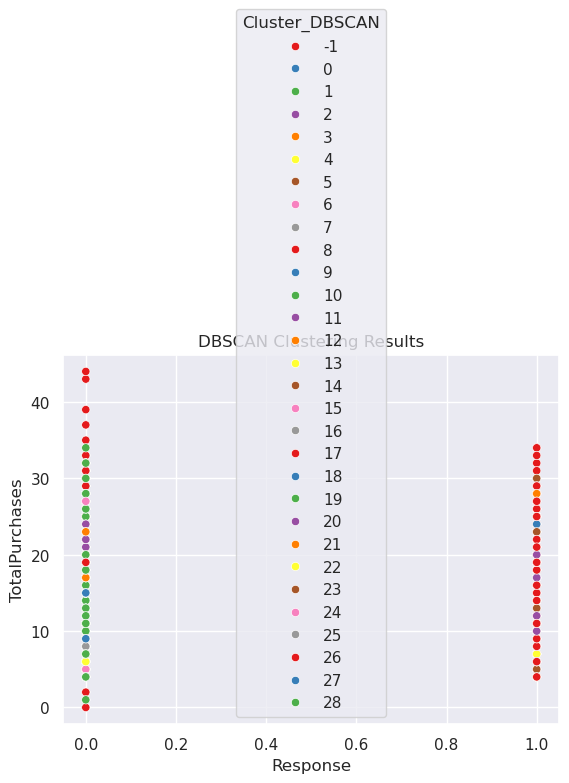

In [110]:
eps_value = 2
dbscan = DBSCAN(eps=eps_value, min_samples=5)
abt['Cluster_DBSCAN'] = dbscan.fit_predict(abt_scaled)

sns.scatterplot(x=abt['Response'], y=abt['TotalPurchases'], hue=abt['Cluster_DBSCAN'], palette='Set1')
plt.title('DBSCAN Clustering Results')
plt.show()